In [697]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import re

In [699]:
#Importar datos
df = pd.read_csv("car data.csv")
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [701]:
# Imputar valores nulos
imputer = SimpleImputer(strategy='mean')

In [703]:
#crear una nueva variable que permite calcular la antigüedad del vehículo con la variable Year
df['Age'] = 2024 - df['Year']

In [705]:
# Convertir variables categóricas en variables dummy
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission','Owner'], drop_first=True)

In [707]:
# Calcular e identificar la correlación entre las variables independientes y la variable dependiente
df_numerico = df.select_dtypes(include=[np.number])
correlacion = df_numerico.corr()
print(correlacion['Selling_Price'].sort_values(ascending=False))

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Age             -0.236141
Name: Selling_Price, dtype: float64


In [709]:
# Seleccionar variables independientes y dependiente
x = df[['Present_Price','Age']]  # Variables independientes
y = df['Selling_Price']  # Variable dependiente

In [711]:
# Dividir el dataset en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [713]:
# Estandarizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [715]:
# Crear el modelo de regresión lineal
modelo = LinearRegression().fit(X_train, y_train)

# Hacer predicciones
predicciones = modelo.predict(x_test)

# Evaluar el modelo
print(f"Coeficiente de determinación (R²): {r2_score(y_test, predicciones):.2f}")

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (Tamaño y Habitaciones)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Precio_Actual, β1): {beta_1}")
print(f"Coeficiente (Antigüedad, β2): {beta_2}")


Coeficiente de determinación (R²): 0.17
Intercepto (β0): 5.416911083644985
Coeficiente (Precio_Actual, β1): 0.5148500551349207
Coeficiente (Antigüedad, β2): -0.4494243937178731


C:\Users\areng\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [717]:
# Reentrenar el modelo con 'Present_Price' y 'Age'
X_reduced = df[['Present_Price', 'Age']]
modelo_reducido = LinearRegression()
modelo_reducido.fit(X_reduced, y)

LinearRegression()

C:\Users\areng\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


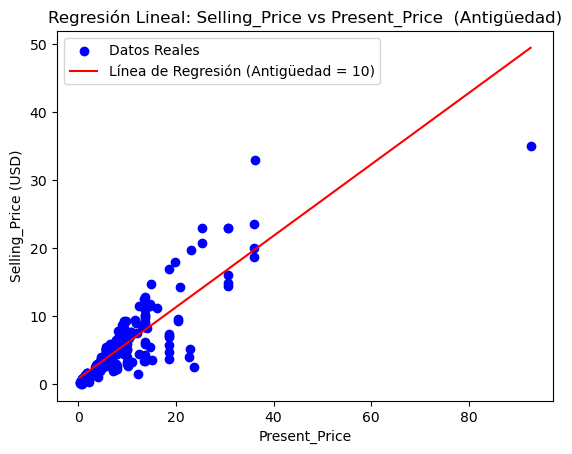

In [719]:
# Predicción manteniendo 'Antigüedad' constante
Precio_act = np.linspace(df['Present_Price'].min(), df['Present_Price'].max(), 100)
Antiguedad= 10 # Ejemplo de valor fijo para
predicciones_fijas = modelo_reducido.predict(np.column_stack((Precio_act, np.full_like(Precio_act, Antiguedad))))
# Graficar los datos reales y la línea de regresión
plt.scatter(x['Present_Price'], y, color='blue', label='Datos Reales')  
plt.plot(Precio_act, predicciones_fijas, color='red', label=f'Línea de Regresión (Antigüedad = {Antiguedad})')
plt.title('Regresión Lineal: Selling_Price vs Present_Price  (Antigüedad)')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price (USD)')
plt.legend()
plt.show()

In [721]:
# Hacer predicciones
predicciones = modelo_reducido.predict(X_reduced)

# Evaluar el modelo
print(f"Coeficiente de determinación (R²): {r2_score(y, predicciones):.2f}")
# Mostrar los coeficientes
print(f"Intercepto (β0): {modelo_reducido.intercept_}")
print(f"Coeficiente (β1): {modelo_reducido.coef_[0]}")
print(f"Coeficiente (β2): {modelo_reducido.coef_[1]}")

Coeficiente de determinación (R²): 0.85
Intercepto (β0): 5.738507719073766
Coeficiente (β1): 0.5246441599940717
Coeficiente (β2): -0.48972229477731927


In [723]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[5.59,10], [9.83,6 ]])  
predicciones = modelo_2.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Present_Price: {nuevo_X[i][0]}, Age: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Present_Price: 5.59, Age: 10.0): 3.69 USD
Predicción 2 para (Present_Price: 9.83, Age: 6.0): 7.76 USD


C:\Users\areng\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [725]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['Present_Price','Age']]
y = df['Selling_Price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio

# Imprimir las métricas
print(f'Error Absoluto Medio (MAE): {mae}')
print("Error cuadrático medio (MSE):", mse)


Error Absoluto Medio (MAE): 1.2640466355277982
Error cuadrático medio (MSE): 3.86105486676836


In [727]:
#Seleccionar variables para otras predicciones, hallar la ecuación del plano que nos permite calcular valores predictores
x1 = "Present_Price"
x2 = "Age"
y = "Selling_Price"

# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Present_Price + {} * Age + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

Ecuación del plano: y = 0.515 * Present_Price + -0.449 * Age + 5.417
Coeficiente de determinación:  0.849


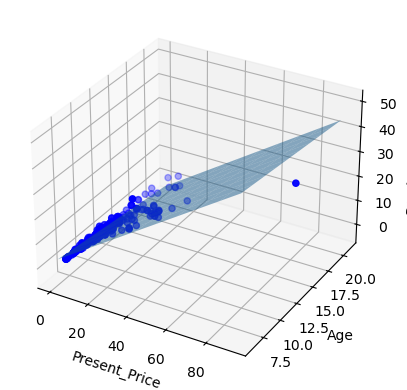

In [729]:
# Gráfica en 3D, ya que al ser una regresión múltiple, no aplica la ecuación de la recta y se representa mejor con un plano
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Precio de venta")
plt.show()